In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [28]:
#hists = load('/Users/hongjieun/MonoTop/monotop_signal2018.merged')
#hists = load('/Users/hongjieun/MonoTop/monotop_pri_sig2018.merged')
#hists_offi = load('/Users/hongjieun/MonoTop/monotop_signal2018.merged')
#hists_priv = load('/Users/hongjieun/MonoTop/monotop_pri_sig2018.merged')
#hists_offi = load('/Users/hongjieun/MonoTop/monotop_off_sig2016.merged')
#hists_priv = load('/Users/hongjieun/MonoTop/notebook_plotting/input_gen_signal/signals2018_added.merged')
#hists_priv = load('/Users/hongjieun/MonoTop/notebook_plotting/signal/sig17_Legacy.merged')
#hists_priv = load('/Users/hongjieun/MonoTop/notebook_plotting/signal/sig2017_20UL_Mphi-3000_bin.merged')
#hists_priv2 = load('/Users/hongjieun/MonoTop/notebook_plotting/signal/sig17_Legacy_3000_bin.merged')
#hists_priv = load('/Users/hongjieun/MonoTop/notebook_plotting/signal/ttag2018.merged')
hists_priv = load('/Users/hongjieun/MonoTop/notebook_plotting/signal/ttag2018_beforeThreshold.merged')

#map = OrderedDict()
#map["Monotop"] = ("Hbb_merged*")

In [3]:
hists_priv['ttag'].identifiers('dataset')

[<StringBin (Mphi-2000_Mchi-1500) instance at 0x7f8a9191ff10>,
 <StringBin (Mphi-2000_Mchi-500) instance at 0x7f8a92bfaf50>,
 <StringBin (Mphi-1995_Mchi-1000) instance at 0x7f8a9074f850>]

In [4]:
hists_priv.keys()

dict_keys(['ttag', 'tmatchj', 'TvsQCD', 'dRfjtop'])

In [ ]:
print('1',hists_priv.keys())
print('2',hists_priv['ttag'])
print('3',hists_priv['ttag'].identifiers('wp'))
print('4',hists_priv['ttag'].identifiers('pt'))
print('5',hists_priv['ttag'].identifiers('abseta'))
print('6',hists_priv['ttag'].identifiers('ttag'))
print('7',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').sum('ttag').values())
print('8',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').sum('abseta').values())
print('9',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('abseta').sum('ttag').values())

In [5]:
tag = 'tmatchj'
data = ['Mphi-2000_Mchi-1500',
       'Mphi-2000_Mchi-500',
       'Mphi-1995_Mchi-1000']

In [29]:
print('2',hists_priv[tag])
#print('3',hists_priv['TvsQCD'].integrate('dataset',data[2]).values())
print('4',hists_priv[tag].integrate('dataset',data[2]).integrate('tag').sum('TvsQCD').values())
print('5',hists_priv[tag].integrate('dataset',data[2]).integrate('tag','pass').sum('TvsQCD').values())
print('6',hists_priv[tag].integrate('dataset',data[2]).integrate('tag','fail').sum('TvsQCD').values())
print('7',hists_priv[tag].integrate('dataset',data[2]).values())

2 <Hist (dataset,tag,TvsQCD) instance at 0x7f8a94749290>
4 {(): 238499.0}
5 {(): 139433.0}
4 {(): 99066.0}
7 {('pass',): array([37867.,  7251.,  4789.,  3660.,  2884.,  2523.,  2228.,  1872.,
        1752.,  1600.,  1394.,  1298.,  1184.,  1117.,  1061.,   969.,
         941.,   933.,   855.,   830.,   768.,   692.,   749.,   696.,
         681.,   610.,   624.,   618.,   569.,   567.,   511.,   490.,
         542.,   490.,   472.,   476.,   486.,   481.,   428.,   414.,
         457.,   419.,   417.,   419.,   404.,   406.,   421.,   363.,
         412.,   389.,   390.,   400.,   396.,   377.,   374.,   376.,
         362.,   363.,   344.,   325.,   361.,   351.,   377.,   385.,
         341.,   381.,   371.,   361.,   379.,   353.,   377.,   354.,
         374.,   391.,   420.,   405.,   393.,   399.,   382.,   449.,
         422.,   445.,   422.,   468.,   451.,   514.,   492.,   597.,
         585.,   609.,   594.,   622.,   713.,   845.,   899.,  1162.,
        1313.,  1977.,  305

In [ ]:
print('pass: ',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').sum('abseta').values()[('pass',)])
print('fail: ',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').sum('abseta').values()[('fail',)])
print('total: ',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('abseta').integrate('wp').sum('ttag').values()[()])

print('pass: ',hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').integrate('ttag','fail').sum('abseta').values())



In [ ]:
# List
hpass = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').sum('abseta').values()[('pass',)]
hfail = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').sum('abseta').values()[('fail',)]
htotal = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('abseta').integrate('wp').sum('ttag').values()[()]

In [ ]:
# Dictionary
hpass = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').integrate('ttag','pass').sum('abseta').values()
hfail = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('wp').integrate('ttag','fail').sum('abseta').values()
htotal = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('abseta').integrate('wp').sum('ttag').values()

In [ ]:
print('hpass: ',hpass)
print('hfail: ',hfail)
print('htotal: ',htotal)
print(hpass[()]+hfail[()])

In [ ]:
rpass = hpass[()]/htotal[()]
rfail = hfail[()]/htotal[()]

print(rpass)
print(rfail)

## Plotting Variables

ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

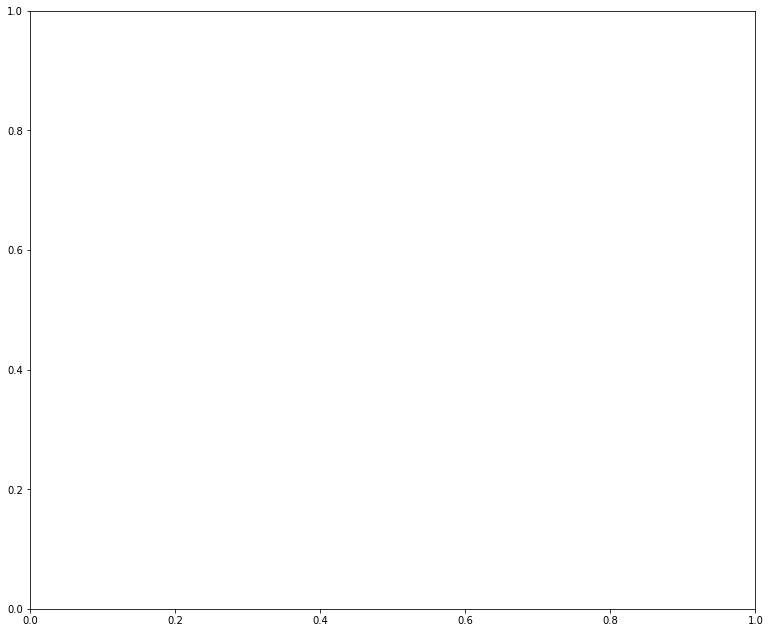

In [7]:
from cycler import cycler

variable = tag#'dRfjtop'
var = 'top pT'

fig, ax = plt.subplots(figsize=(13,11))
#fig, ax = plt.plot(figsize=(13,11))

ax = plot.plot1d(
    hists_priv[variable],
    #overlay="dataset",
    stack=False,
    #label='UL_Mphi-995_Mchi-500'
    #fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)
ax.set_xlim(0., 6)
#ax.set_ylim(0., 10000)

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/ttag_eff') 
plot_name = 'sigUL18_'+variable+'.png'
#plt.savefig(os.path.join(plot_path, plot_name))





## Plotting 'pass/total' and 'fail/total'

<Hist (TvsQCD) instance at 0x7f8a93058d90>
<Hist (TvsQCD) instance at 0x7f8a93058e90>
[122837.  10335.   6402.   4723.   3634.   3111.   2687.   2232.   2116.
   1868.   1630.   1502.   1364.   1281.   1217.   1110.   1080.   1059.
    958.    952.    863.    785.    826.    786.    769.    683.    684.
    675.    643.    640.    565.    541.    608.    545.    518.    521.
    537.    537.    480.    460.    504.    479.    446.    461.    445.
    446.    461.    404.    452.    439.    423.    435.    448.    408.
    406.    400.    402.    398.    368.    347.    396.    381.    405.
    415.    373.    406.    397.    391.    410.    388.    403.    383.
    392.    421.    443.    444.    414.    431.    413.    478.    459.
    473.    453.    490.    492.    544.    530.    633.    613.    658.
    633.    657.    762.    889.    947.   1211.   1370.   2048.   3156.
  19961.]
[37867.  7251.  4789.  3660.  2884.  2523.  2228.  1872.  1752.  1600.
  1394.  1298.  1184.  1117.  

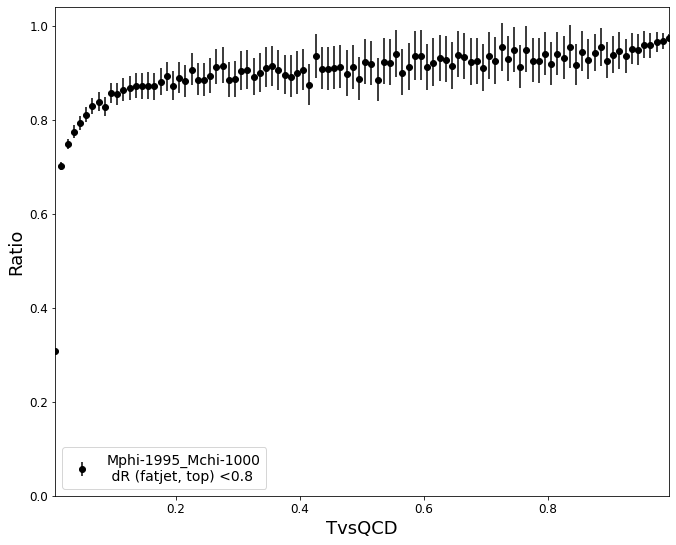

In [8]:
#fig, ax = plt.subplots(figsize=(13,11))

vari = 'tmatchj'
hname = data[2]
AK8cone = 0.8

denominator = hists_priv[vari].integrate('dataset',hname).integrate('tag')
numerator = hists_priv[vari].integrate('dataset',hname).integrate('tag','pass')

print(denominator)
print(numerator)
print(denominator.values()[()])
print(numerator.values()[()])

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})

numerator.label = 'Ratio'
#ax = plt.subplots(figsize=(13,11))
ax = plot.plotratio(
    num=numerator,
    denom=denominator,
    error_opts={'color': 'k', 'marker': 'o'},
    unc='num',
    label=hname+'\n dR (fatjet, top) <'+str(AK8cone)
)

#ax.set_xlim(0., 2000)
ax.legend(loc='lower left')

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/ttag_eff') 
plot_name = 'sigUL18_'+vari+'.png'
#plt.savefig(os.path.join(plot_path, plot_name))


## Plotting with .scale

238499.0
4 {('pass',): array([0.15877215, 0.03040264, 0.02007975, 0.01534598, 0.01209229,
       0.01057866, 0.00934176, 0.00784909, 0.00734594, 0.00670862,
       0.00584489, 0.00544237, 0.00496438, 0.00468346, 0.00444866,
       0.00406291, 0.00394551, 0.00391197, 0.00358492, 0.0034801 ,
       0.00322014, 0.00290148, 0.00314047, 0.00291825, 0.00285536,
       0.00255766, 0.00261636, 0.00259121, 0.00238575, 0.00237737,
       0.00214257, 0.00205452, 0.00227255, 0.00205452, 0.00197904,
       0.00199582, 0.00203774, 0.00201678, 0.00179456, 0.00173586,
       0.00191615, 0.00175682, 0.00174844, 0.00175682, 0.00169393,
       0.00170231, 0.00176521, 0.00152202, 0.00172747, 0.00163103,
       0.00163523, 0.00167716, 0.00166038, 0.00158072, 0.00156814,
       0.00157653, 0.00151783, 0.00152202, 0.00144235, 0.00136269,
       0.00151363, 0.0014717 , 0.00158072, 0.00161426, 0.00142978,
       0.00159749, 0.00155556, 0.00151363, 0.00158911, 0.00148009,
       0.00158072, 0.00148428, 0.001568

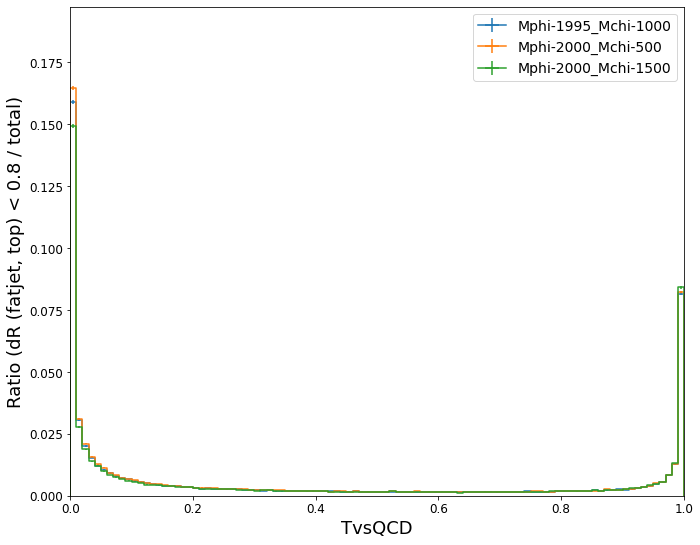

In [33]:
##### total
#fig, ax = plt.subplots(figsize=(13,11))

vari = 'tmatchj'
hname = data[2]
AK8cone = 0.8

#denominator = hists_priv[vari].integrate('dataset',hname).integrate('tag')
#numerator = hists_priv[vari].integrate('dataset',hname).integrate('tag','pass')

#print(denominator)
#print(numerator)
#print(denominator.values()[()])
#print(numerator.values()[()])

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})

tot = {}

for i in data:
    tot[i] = hists_priv[vari].integrate('dataset',i).integrate('tag').sum('TvsQCD').values()[()]
    
print(tot[data[2]])
    
for d in data:
    hists_priv[vari].scale({d:1/tot[d]},axis='dataset')
    
print('4',hists_priv[vari].integrate('dataset',data[2]).values())



#ax.label = 'Ratio'
#ax = plt.subplots(figsize=(13,11))
ax = plot.plot1d(
    hists_priv[vari].integrate('tag','pass'),
    #overlay="dataset",
    stack=False,
    #label='UL_Mphi-995_Mchi-500'
    #label=hname+'\n dR (fatjet, top) <'+str(AK8cone)
    #fill_opts={'alpha': 
)
#ax.set_xlim(0., 2000)
#ax.legend(loc='lower left')
ax.legend(loc='best')
plt.ylabel('Ratio (dR (fatjet, top) < 0.8 / total)')

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/ttag_eff') 
plot_name = 'sigUL18_'+vari+'.png'
#plt.savefig(os.path.join(plot_path, plot_name))


In [ ]:
#fig, ax = plt.subplots(figsize=(13,11))

hname = data[2]
TvsQCDwp = 0.65

denominator = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('abseta').integrate('wp').sum('ttag')
numerator = hists_priv['ttag'].integrate('dataset','Mphi-1995_Mchi-1000').integrate('ttag','pass').integrate('wp').sum('abseta')

print(denominator)
print(numerator)
print(denominator.values()[()])
print(numerator.values()[()])

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})

numerator.label = 'Ratio(pass/total)'
#ax = plt.subplots(figsize=(13,11))
ax = plot.plotratio(
    num=numerator,
    denom=denominator,
    error_opts={'color': 'k', 'marker': 'o'},
    unc='num',
    label=hname+'\n >'+str(TvsQCDwp)
)

ax.set_xlim(0., 2000)
ax.legend(loc='best')


# Back-up

In [ ]:
from cycler import cycler

variable = 'met'
mphi = str(2000)
mchi = str(1500)
hname = 'Monotop_Mphi_'+mphi+'_Mchi_'+mchi

#fig = plt.subplots(1, 1, figsize=(11,13), gridspec_kw={"height_ratios": (1, 1)}, sharex=False)

offical = ['Vector_MonoTop_NLO_Mphi-1995_Mchi-1000_13TeV_TuneCP5_mcatnlo_pythia8',
           'Vector_MonoTop_NLO_Mphi-2000_Mchi-1500_13TeV_TuneCP5_mcatnlo_pythia8',
           'Vector_MonoTop_NLO_Mphi-2000_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8']

private = ['VectorMonotop_Mphi_1995_Mchi_1000',
           'VectorMonotop_Mphi_2000_Mchi_1500',
           'VectorMonotop_Mphi_2000_Mchi_500']

soff = {}
spri = {}

for i, j in zip(offical, private):
    soff[i] = hists_offi[variable].integrate('dataset',i).sum(variable).values()[()]
    spri[j] = hists_priv[variable].integrate('dataset',j).sum(variable).values()[()]

for d in offical:
    hists_offi[variable].scale({d:1/soff[d]},axis='dataset')

for d in private:
    hists_priv[variable].scale({d:1/spri[d]},axis='dataset')
    

denominator = hists_offi[variable].integrate('dataset', 'Vector_MonoTop_NLO_Mphi-'+mphi+'_Mchi-'+mchi+'_13TeV_TuneCP5_mcatnlo_pythia8')
numerator = hists_priv[variable].integrate('dataset', 'VectorMonotop_Mphi_'+mphi+'_Mchi_'+mchi)

print(denominator.values()[()])
print(numerator.values()[()])

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})

numerator.label = 'Ratio(private/official)'
#ax = plt.subplots(figsize=(13,11))
ax = plot.plotratio(
    num=numerator,
    denom=denominator,
    error_opts={'color': 'k', 'marker': '.'},
    unc='num',
    label=hname
)

ax.set_ylim(0.80, 1.20)



leg = ax.legend(loc='best')

#hists[variable].axis('dataset').index('VectorMonotop_Mphi_1995_Mchi_1000').label = 'Mphi-1995_Mchi-1000'
#hists[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_1500').label = 'Mphi-2000_Mchi-1500'
#hists[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_500').label = 'Mphi-2000_Mchi-500'


plot_path = os.path.abspath('/Users/hongjieun/MonoTop/signal_monotop2018_private') 
plot_name = 'ratio_'+variable+'_'+hname+'.png'
plt.savefig(os.path.join(plot_path, plot_name))



In [ ]:
from cycler import cycler

variable = 'toppt'
var = 'top pT'

#fig = plt.subplots(1, 1, figsize=(11,13), gridspec_kw={"height_ratios": (1, 1)}, sharex=False)
fig, ax = plt.subplots(figsize=(13,11))
#fig, ax = plt.plot(figsize=(13,11))

ax = plot.plot1d(
    hists_priv[variable],
    #overlay="dataset",
    stack=False,
    #label='UL_Mphi-995_Mchi-500'
    #fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)

#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_1995_Mchi_1000').label = 'Mphi-1995_Mchi-1000'
#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_1500').label = 'Mphi-2000_Mchi-1500'
#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_500').label = 'Mphi-2000_Mchi-500'

#ax.set_xlabel('AK15 Leading Jet phi')
font1 = {'size' : 24
        }
plt.xlabel(var, fontdict=font1)
plt.ylabel('Events', fontdict=font1)

plt.grid(True)
plt.legend(loc='best', ncol=1, fontsize=16)

plt.tick_params(axis='both', labelsize=18)
ax.set_yscale('log')
ax.set_ylim(.00000001, None)
#ax.set_xlim(.1, None)

datam = 'Mphi-2500' #'Mphi-2500'

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/plots_Legacy17') 
plot_name = 'sig2_'+variable+'_'+datam+'.png'
#plt.savefig(os.path.join(plot_path, plot_name))



In [ ]:
from cycler import cycler

variable = 'toppt'
var = 'Top pT'

#fig = plt.subplots(1, 1, figsize=(11,13), gridspec_kw={"height_ratios": (1, 1)}, sharex=False)
fig, ax = plt.subplots(figsize=(13,11))
#fig, ax = plt.plot(figsize=(13,11))

mass = 'Mphi3000'
#mass = 'Mphi3000_Legacy'

Mphi1000 = ['Mphi-995_Mchi-500',
           'Mphi-1000_Mchi-150',
           'Mphi-1000_Mchi-1000']
Mphi2500 = ['Mphi-2500_Mchi-750',
           'Mphi-2500_Mchi-2000',
           'Mphi-2495_Mchi-1250']
Mphi500 = ['Mphi-500_Mchi-500',
           'Mphi-500_Mchi-150',
           'Mphi-495_Mchi-250']
Mphi3000 = ['Mphi-3000_Mchi-2000',
           'Mphi-3000_Mchi-1000',
           'Mphi-2995_Mchi-1500']
Mphi2000 = ['Mphi-2000_Mchi-500',
           'Mphi-2000_Mchi-1500',
           'Mphi-1995_Mchi-1000']

Mphi2500L = ['Vector_MonoTop_NLO_Mphi-2500_Mchi-2000_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-2500_Mchi-750_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-2495_Mchi-1250_13TeV_TuneCP5_mcatnlo_pythia8']
Mphi3000L = ['Vector_MonoTop_NLO_Mphi-3000_Mchi-2000_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-3000_Mchi-1000_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-2995_Mchi-1500_13TeV_TuneCP5_mcatnlo_pythia8']
Mphi500L = ['Vector_MonoTop_NLO_Mphi-500_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-500_Mchi-150_13TeV_TuneCP5_mcatnlo_pythia8',
             'Vector_MonoTop_NLO_Mphi-495_Mchi-250_13TeV_TuneCP5_mcatnlo_pythia8']
p1 ={}
p2 = {}

for i, j in zip(Mphi3000, Mphi3000L):
    p1[i] = hists_priv[variable].integrate('dataset',i).sum(variable).values()[()]
    p2[j] = hists_priv2[variable].integrate('dataset',j).sum(variable).values()[()]


for d in Mphi3000L:
    hists_priv2[variable].scale({d:1/p2[d]},axis='dataset')

for d in Mphi3000:
    hists_priv[variable].scale({d:1/p1[d]},axis='dataset')
    
ax = plot.plot1d(
    hists_priv[variable],#.integrate('dataset','Mphi-1000_Mchi-1000'),
    #overlay="dataset",
    stack=False,
    #label='UL_Mphi-995_Mchi-500'
    #fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)

#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_1995_Mchi_1000').label = 'Mphi-1995_Mchi-1000'
#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_1500').label = 'Mphi-2000_Mchi-1500'
#hists_priv[variable].axis('dataset').index('VectorMonotop_Mphi_2000_Mchi_500').label = 'Mphi-2000_Mchi-500'

#ax.set_xlabel('AK15 Leading Jet phi')
font1 = {'size' : 24
        }
plt.xlabel(var, fontdict=font1)
plt.ylabel('Events (Norm)', fontdict=font1)

plt.grid(True)
plt.legend(loc='best', ncol=1, fontsize=16)

plt.tick_params(axis='both', labelsize=18)
#ax.set_xlim(0.,3000)
ax.set_yscale('log')
ax.set_ylim(.00000001, None)
#ax.set_xlim(.1, None)

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/plots_20UL17_Norm') 
plot_name = 'sig2_'+variable+'_'+mass+'_log.png'
plt.savefig(os.path.join(plot_path, plot_name))



In [ ]:
mphi1000 = ['Mphi-995_Mchi-500','Mphi-1000_Mchi-150','Mphi-1000_Mchi-1000']
mphi2500 = ['Mphi-2500_Mchi-750','Mphi-2500_Mchi-2000','Mphi-2495_Mchi-1250']

In [ ]:
offi1 = 'Vector_MonoTop_NLO_Mphi-1995_Mchi-1000_13TeV_TuneCP5_mcatnlo_pythia8'
offi2 = 'Vector_MonoTop_NLO_Mphi-2000_Mchi-1500_13TeV_TuneCP5_mcatnlo_pythia8'
offi3 = 'Vector_MonoTop_NLO_Mphi-2000_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8'

priv1 = 'VectorMonotop_Mphi_1995_Mchi_1000'
priv2 = 'VectorMonotop_Mphi_2000_Mchi_1500'
priv3 = 'VectorMonotop_Mphi_2000_Mchi_500'

In [ ]:
######
#### editted for 995-500 samples
######
from cycler import cycler

variable = 'njets'
mphi = str(995)
mchi = str(500)
hname = 'Monotop_Mphi_'+mphi+'_Mchi_'+mchi
#offiname = 'Vector_MonoTop_NLO_Mphi-'+mphi+'_Mchi-'+mchi+'_13TeV_TuneCP5_mcatnlo_pythia8'
#privname = 'VectorMonotop_Mphi_'+mphi+'_Mchi_'+mchi

offiname = 'Vector_MonoTop_NLO_Mphi-'+mphi+'_Mchi-'+mchi+'_13TeV_TuneCP5_mcatnlo_pythia8'
privname = 'UL_995_500'

offical = [
#    'Vector_MonoTop_NLO_Mphi-1995_Mchi-1000_13TeV_TuneCP5_mcatnlo_pythia8',
    'Vector_MonoTop_NLO_Mphi-995_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8'
#    'Vector_MonoTop_NLO_Mphi-2000_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8'
    ]

private = ['UL_995_500']

#private = ['VectorMonotop_Mphi_1995_Mchi_1000',
#           'VectorMonotop_Mphi_2000_Mchi_1500',
#           'VectorMonotop_Mphi_2000_Mchi_500']

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})
colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26']
fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

#hists_offi[variable].axis('dataset').index(offiname).label = hname+' official'
hists_priv[variable].axis('dataset').index(offiname).label = hname+' official'
hists_priv[variable].axis('dataset').index(privname).label = hname+' private'


soff = {}
spri = {}

for i, j in zip(offical, private):
    #soff[i] = hists_offi[variable].integrate('dataset',i).sum(variable).values()[()]
    soff[i] = hists_priv[variable].integrate('dataset',i).sum(variable).values()[()]
    spri[j] = hists_priv[variable].integrate('dataset',j).sum(variable).values()[()]

for d in offical:
    #hists_offi[variable].scale({d:1/soff[d]},axis='dataset')
    hists_priv[variable].scale({d:1/soff[d]},axis='dataset')

for d in private:
    hists_priv[variable].scale({d:1/spri[d]},axis='dataset')
    
#denominator = hists_offi[variable].integrate('dataset', offiname)
denominator = hists_priv[variable].integrate('dataset', offiname)
numerator = hists_priv[variable].integrate('dataset', privname)


print(denominator.values()[()])
print(numerator.values()[()])

plot.plot1d(hists_priv[variable].integrate('dataset',offiname),
#plot.plot1d(hists_offi[variable].integrate('dataset',offiname),
            ax = ax,
           clear=False,
           error_opts={'color': '#3130db','linestyle':'-','marker':'o','markersize': 8.}
           )

plot.plot1d(hists_priv[variable].integrate('dataset',privname), 
            ax = ax,
           clear=False,
           error_opts={'color': 'r','linestyle':'-','marker':'s','markersize': 8.}
           )

plot.plotratio(
    num=numerator,
    denom=denominator,
    ax = rax,
    error_opts={'color': 'k', 'marker': '.','markersize': 10},
    unc='num')


#denominator.label = hname+' official'
#numerator.label = hname+' private'

ax.set_ylabel('Events (norm)')
ax.set_xlabel('number of AK4 jet')
#ax.set_yscale('log')

#ax.grid(axis='x')

rax.set_ylabel('Ratio(private/official')
rax.set_xlabel('')
rax.set_ylim(0.5,1.5)
rax.grid(axis='y')

#leg = ax.legend(ncol=2, loc='best')

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/signal/plots_compare') 
plot_name = 'ratio_'+variable+'_'+hname+'.png'
plt.savefig(os.path.join(plot_path, plot_name))


In [ ]:
from cycler import cycler

variable = 'fj1pt'
mphi = str(2000)
mchi = str(1500)
hname = 'Monotop_Mphi_'+mphi+'_Mchi_'+mchi
#offiname = 'Vector_MonoTop_NLO_Mphi-'+mphi+'_Mchi-'+mchi+'_13TeV_TuneCP5_mcatnlo_pythia8'
#privname = 'VectorMonotop_Mphi_'+mphi+'_Mchi_'+mchi

offiname = 'Vector_MonoTop_NLO_Mphi-'+mphi+'_Mchi-'+mchi+'_13TeV_TuneCP5_mcatnlo_pythia8'
privname = 'monotop2016_2000_1500_nanoaod'

offical = [
#    'Vector_MonoTop_NLO_Mphi-1995_Mchi-1000_13TeV_TuneCP5_mcatnlo_pythia8',
    'Vector_MonoTop_NLO_Mphi-2000_Mchi-1500_13TeV_TuneCP5_mcatnlo_pythia8'
#    'Vector_MonoTop_NLO_Mphi-2000_Mchi-500_13TeV_TuneCP5_mcatnlo_pythia8'
    ]

private = ['monotop2016_2000_1500_nanoaod']

#private = ['VectorMonotop_Mphi_1995_Mchi_1000',
#           'VectorMonotop_Mphi_2000_Mchi_1500',
#           'VectorMonotop_Mphi_2000_Mchi_500']

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(11,9)})
colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26']
fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

hists_offi[variable].axis('dataset').index(offiname).label = hname+' official'
hists_priv[variable].axis('dataset').index(privname).label = hname+' private'


soff = {}
spri = {}

for i, j in zip(offical, private):
    soff[i] = hists_offi[variable].integrate('dataset',i).sum(variable).values()[()]
    spri[j] = hists_priv[variable].integrate('dataset',j).sum(variable).values()[()]

for d in offical:
    hists_offi[variable].scale({d:1/soff[d]},axis='dataset')

for d in private:
    hists_priv[variable].scale({d:1/spri[d]},axis='dataset')
    
denominator = hists_offi[variable].integrate('dataset', offiname)
numerator = hists_priv[variable].integrate('dataset', privname)


print(denominator.values()[()])
print(numerator.values()[()])

plot.plot1d(hists_offi[variable].integrate('dataset',offiname),
            ax = ax,
           clear=False,
           error_opts={'color': '#3130db','linestyle':'-','marker':'o','markersize': 8.}
           )

plot.plot1d(hists_priv[variable].integrate('dataset',privname), 
            ax = ax,
           clear=False,
           error_opts={'color': 'r','linestyle':'-','marker':'s','markersize': 8.}
           )

plot.plotratio(
    num=numerator,
    denom=denominator,
    ax = rax,
    error_opts={'color': 'k', 'marker': '.','markersize': 10},
    unc='num')


#denominator.label = hname+' official'
#numerator.label = hname+' private'

ax.set_ylabel('Events (norm)')
ax.set_xlabel('AK15 Leading Jet pt')
#ax.set_yscale('log')

#ax.grid(axis='x')

rax.set_ylabel('Ratio(private/official')
rax.set_xlabel('')
rax.set_ylim(0.5,1.5)
rax.grid(axis='y')

#leg = ax.legend(ncol=2, loc='best')

plot_path = os.path.abspath('/Users/hongjieun/MonoTop/signal_monotop2016_private') 
plot_name = 'ratio_'+variable+'_'+hname+'.png'
plt.savefig(os.path.join(plot_path, plot_name))


### Example Lines

In [ ]:
hists_offi['metphi'].integrate('dataset', 'Vector_MonoTop_NLO_Mphi-2000_Mchi-1500_13TeV_TuneCP5_mcatnlo_pythia8').sum('metphi', overflow='all').values()[()]

In [ ]:
hists_offi['met'].integrate('dataset').sum('met', overflow='all').values()

In [ ]:
hists_priv['met'].integrate('dataset','VectorMonotop_Mphi_2000_Mchi_1500').sum('met', overflow='all').values()[()]

In [ ]:
hists_priv['met'].integrate('dataset','VectorMonotop_Mphi_1995_Mchi_1000').scale(1./(hists_offi['met'].integrate('dataset').sum('met', overflow='all').values()[()]))